In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [3]:
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv("./sonar_dataset.csv", header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
92,0.0260,0.0192,0.0254,0.0061,0.0352,0.0701,0.1263,0.1080,0.1523,0.1630,...,0.0118,0.0120,0.0051,0.0070,0.0015,0.0035,0.0008,0.0044,0.0077,R
115,0.0414,0.0436,0.0447,0.0844,0.0419,0.1215,0.2002,0.1516,0.0818,0.1975,...,0.0045,0.0136,0.0113,0.0053,0.0165,0.0141,0.0077,0.0246,0.0198,M
149,0.0207,0.0535,0.0334,0.0818,0.0740,0.0324,0.0918,0.1070,0.1553,0.1234,...,0.0033,0.0050,0.0190,0.0103,0.0121,0.0042,0.0090,0.0070,0.0099,M
22,0.0099,0.0484,0.0299,0.0297,0.0652,0.1077,0.2363,0.2385,0.0075,0.1882,...,0.0173,0.0149,0.0115,0.0202,0.0139,0.0029,0.0160,0.0106,0.0134,R
126,0.0715,0.0849,0.0587,0.0218,0.0862,0.1801,0.1916,0.1896,0.2960,0.4186,...,0.0153,0.0121,0.0096,0.0196,0.0042,0.0066,0.0099,0.0083,0.0124,M


In [6]:
df.shape

(208, 61)

In [7]:
df.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
...,...
56,float64
57,float64
58,float64
59,float64


In [8]:
# check for nan values
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [9]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [10]:
df[60].value_counts() # label is not skewed

,count
60,
M,111
R,97


In [11]:
X = df.drop(60, axis=1)
y = df[60]
y.head()

,60
0,R
1,R
2,R
3,R
4,R


In [12]:
y = pd.get_dummies(y, drop_first=True)
y.sample(5)

,R
43,True
16,True
160,False
179,False
202,False


In [13]:
y.value_counts()

,count
R,
False,111
True,97


In [14]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [15]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
cols_to_scale = list(range(0, 61))  # Columns from index 0 to 60

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the numeric columns only
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [16]:
for col in df:
    print(f'{col}: {df[col].unique()}')

0: [0.13643068 0.32300885 0.18215339 0.06268437 0.55088496 0.19985251
 0.22271386 0.37168142 0.15339233 0.10988201 0.01769912 0.07964602
 0.04719764 0.05530973 0.08038348 0.20870206 0.24852507 0.13053097
 0.1880531  0.08185841 0.33775811 0.47861357 0.0619469  0.07374631
 0.20501475 0.13716814 0.10029499 0.11946903 0.12831858 0.1659292
 0.05088496 0.13274336 0.31489676 0.21828909 0.14085546 0.05825959
 0.23451327 0.0560472  0.03908555 0.05752212 0.14454277 0.17846608
 0.28982301 0.2160767  0.2640118  0.12905605 0.07669617 0.24926254
 0.08554572 0.05309735 0.08628319 0.10103245 0.14823009 0.15486726
 0.08112094 0.08480826 0.08849558 0.05235988 0.03834808 0.04129794
 0.11873156 0.18436578 0.26032448 0.03687316 0.01548673 0.14233038
 0.09144543 0.06932153 0.1379056  0.16519174 0.23672566 0.15929204
 0.06858407 0.15781711 0.29056047 0.14896755 0.26769912 0.25811209
 0.12758112 0.62020649 0.19100295 0.16224189 0.17551622 0.18067847
 0.32743363 0.00737463 0.20353982 0.12241888 0.35103245 0.95

In [17]:
smote = SMOTE()

# Separate features and target variable
X = df.drop(60, axis=1)  # Assuming column 60 is your target variable
y = df[60]

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a balanced DataFrame from resampled data
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                         pd.DataFrame(y_resampled, columns=[60])], axis=1)

# Check the value counts of the target column to ensure balancing
print(df_balanced[60].value_counts())

60
R    111
M    111
Name: count, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [19]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
67,0.260324,0.170167,0.099212,0.055873,0.190971,0.333244,0.305195,0.134068,0.011847,0.056199,...,0.057769,0.118402,0.402597,0.438596,0.170068,0.169231,0.375000,0.146453,0.212121,0.143187
14,0.080383,0.183026,0.193495,0.092962,0.134415,0.067992,0.134740,0.063506,0.144676,0.287001,...,0.077689,0.106990,0.135065,0.479532,0.412698,0.128205,0.315341,0.441648,0.402204,0.129330
164,0.109145,0.082297,0.061432,0.077984,0.173726,0.360656,0.393398,0.315105,0.350511,0.387387,...,0.026892,0.098431,0.054545,0.061404,0.174603,0.041026,0.230114,0.240275,0.225895,0.062356
179,0.279499,0.177454,0.141590,0.117214,0.134415,0.353131,0.249729,0.164719,0.228491,0.349635,...,0.117530,0.196862,0.090909,0.304094,0.058957,0.148718,0.278409,0.148741,0.143251,0.187067
19,0.081858,0.061294,0.205650,0.398003,0.633528,0.660306,0.788420,0.894157,0.726788,0.830402,...,0.152390,0.119829,0.077922,0.257310,0.260771,0.005128,0.505682,0.208238,0.316804,0.131640


In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [21]:
df = pd.read_csv("./sonar_dataset.csv", header=None)


In [22]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform target variables in both training and test sets
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=400,
    max_depth=6,
    learning_rate=0.04,
    reg_alpha=0.01,  # L1 regularization
    reg_lambda=1, # L2 regularization
    subsample=0.8 # Try subsampling 80% of the data

)

# Define evaluation set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the model
model.fit(X_train, y_train,
          eval_set=eval_set,
          verbose=False)

# Predict on the test set
preds = model.predict(X_test)


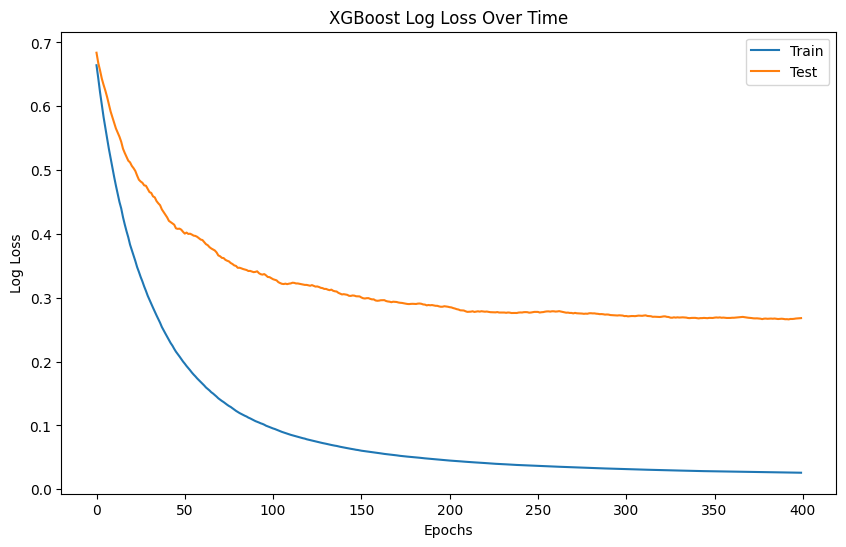

In [23]:
results = model.evals_result()

epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Over Time')
plt.legend()
plt.show()





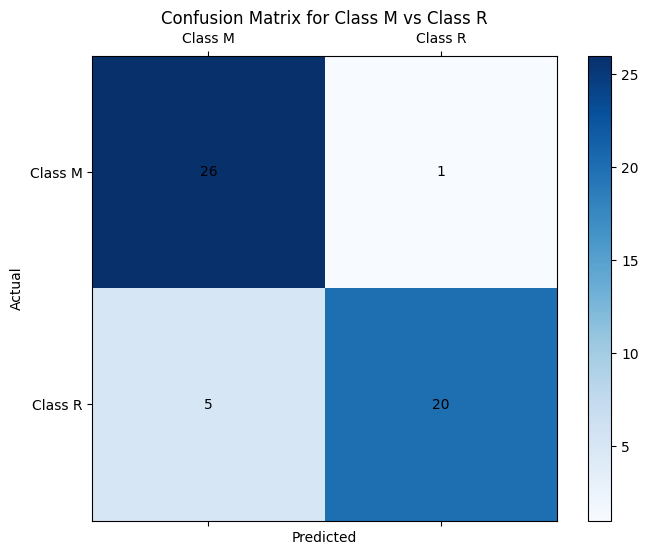

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)

# Define custom labels based on your dataset ('M' and 'R')
labels = ['Class M', 'Class R']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.matshow(cm, cmap=plt.cm.Blues, fignum=1)
plt.colorbar()

# Label the axes and set custom tick marks with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)

# Add numerical values inside the matrix
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.title('Confusion Matrix for Class M vs Class R')
plt.show()

In [25]:
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.2f}")
report = classification_report(y_test, preds)
print("Classification Report:")
print(report)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.95      0.80      0.87        25

    accuracy                           0.88        52
   macro avg       0.90      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52



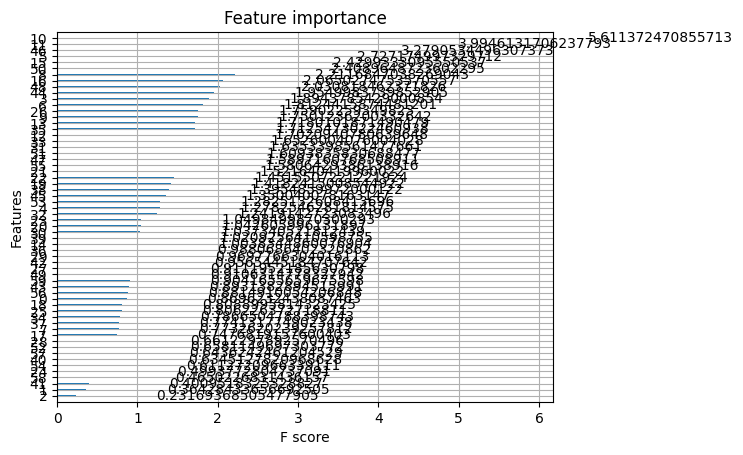

In [26]:
xgb.plot_importance(model, importance_type='gain')
plt.show()

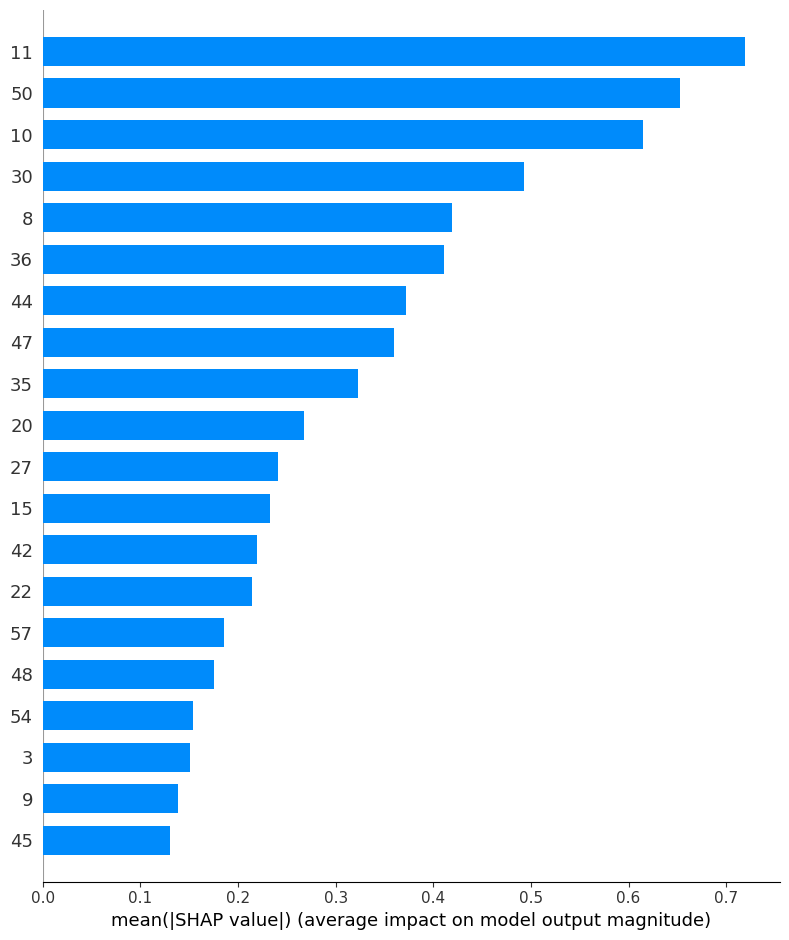

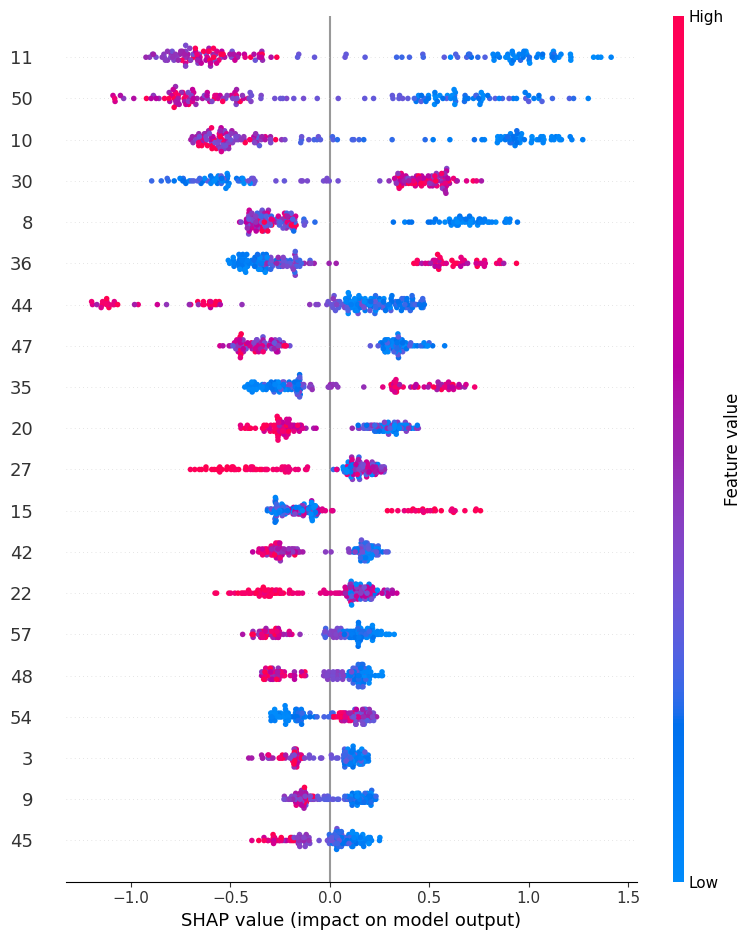

In [32]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(model)

# Compute SHAP values for the training data
shap_values = explainer(X_train)

# Plot a bar chart of feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Plot a detailed summary of SHAP values across samples
shap.summary_plot(shap_values, X_train)

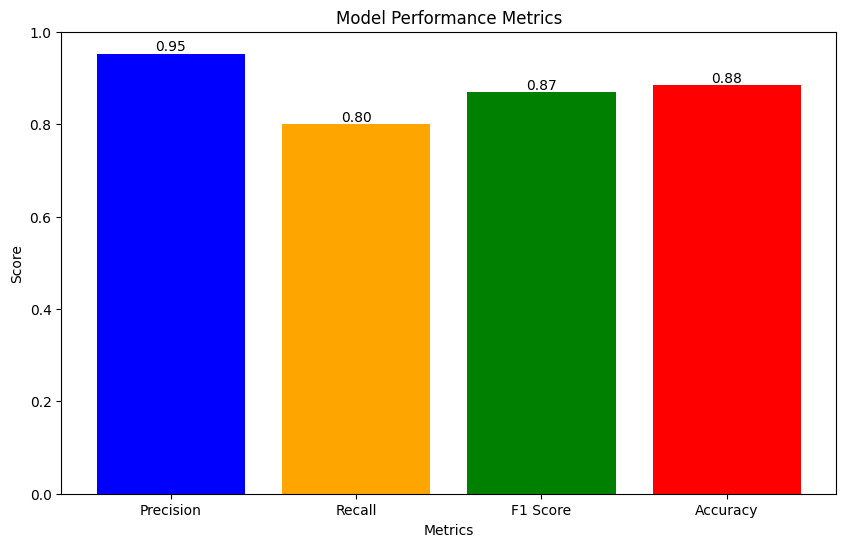

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming preds are your predictions and y_test is the true labels
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)

# Create a bar plot
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Set the limit for y-axis
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')

# Add value annotations on top of the bars
for index, value in enumerate(values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()